# Data science automation

This week is all about looking at automation tehcniques for data science and with Python. We can automate a lot of things with Python: collecting data, processing it, cleaning it, and many other parts of the data science pipeline. Here, we will show how to:

- use the pycaret autoML Python package to find an optimized ML model for our diabetes dataset
- create a Python script to ingest new data and make predictions on it

Often, next steps in fully operationalizing an ML pipeline like this are to use a cloud service to scale and serve our ML algorithm. We can use things like AWS lambda, GCP, AWS, or Azure ML depolyment with tools such as docker and kubernetes.

## Load data

First, we are going to load our same prepared data from week 2 where everything has been converted to numbers. Many autoML packages can handle non-numeric data (they usually convert it to numeric with various methods).

In [20]:
import pandas as pd

df = pd.read_csv('data/prepped_diabetes_data.csv', index_col='Patient number')
df

,Cholesterol,Glucose,HDL Chol,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Diabetes,waist_hip_ratio,hdl_chol_ratio
Patient number,,,,,,,,,,,,,,,
1,193,77,49,19,1,61,119,22.5,118,70,32,38,0,0.842105,0.253886
2,146,79,41,19,1,60,135,26.4,108,58,33,40,0,0.825000,0.280822
3,217,75,54,20,1,67,187,29.3,110,72,40,45,0,0.888889,0.248848
4,226,97,70,20,1,64,114,19.6,122,64,31,39,0,0.794872,0.309735
5,164,91,67,20,1,70,141,20.2,122,86,32,39,0,0.820513,0.408537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,227,105,44,83,1,59,125,25.2,150,90,35,40,0,0.875000,0.193833
387,226,279,52,84,1,60,192,37.5,144,88,41,48,1,0.854167,0.230088
388,301,90,118,89,1,61,115,21.7,218,90,31,41,0,0.756098,0.392027


# AutoML with pycaret

Our next step is to use pycart for autoML. We will need to install the Python package with conda or pip: `conda install -c conda-forge pycaret -y`. Then we can import the functions we need:

In [21]:
from pycaret.classification import setup, compare_models, predict_model, save_model, load_model

There are some instructions for how to use pycaret in their [documentation](https://pycaret.org/guide/). Since this is a relatively new package at the moment (it was created in late 2019), there can be some bugs and minor issues with the software. However, it still works well overall, especially for something so complex.

Note: You'll notice in the documentation for pycaret (and other autoML packages lke MLBox) they import things like `from pycaret.classification import *`. This is bad practice (as defined in [PEP8](https://www.python.org/dev/peps/pep-0008/)) and should be avoided. Instead we should import specific functions or classes as we did above.

Next, we can setup our autoML:

In [24]:
automl = setup(df, target='Diabetes')

,Description,Value
0,session_id,362
1,Target,Diabetes
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(390, 15)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


This will ask us to check if the datatypes of the input data are correct. In this case, they seem fine. There are a huge number of parameters we can set that we can see in the [docs](https://pycaret.org/classification/) or if we run `?setup` in a cell. For now, we are leaving everything else at the default. However, relating it to last week, we can see there is a feature_selection option we could set.

By default, it preprocesses data (converts categorical columns into numeric). We can see what the preprocessed data looks like from one of the elements in the automl object. It seems like the index of the object (6 for unmodified data and 14 for preprocessed here) may change sometimes (possibly a bug or peculariaty with pycaret).

In [30]:
automl[6]

,Cholesterol,Glucose,HDL Chol,Age,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,waist_hip_ratio,hdl_chol_ratio,Gender_0
Patient number,,,,,,,,,,,,,,
8,164.0,71.0,63.0,20.0,72.0,145.0,19.700001,108.0,78.0,29.0,36.0,0.805556,0.384146,1.0
169,269.0,59.0,66.0,41.0,67.0,191.0,29.900000,130.0,73.0,38.0,41.0,0.926829,0.245353,1.0
51,164.0,94.0,58.0,28.0,67.0,180.0,28.200001,128.0,94.0,39.0,43.0,0.906977,0.353659,0.0
242,218.0,182.0,54.0,51.0,66.0,215.0,34.700001,139.0,69.0,42.0,53.0,0.792453,0.247706,0.0
260,216.0,79.0,46.0,54.0,65.0,138.0,23.000000,132.0,80.0,33.0,39.0,0.846154,0.212963,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,300.0,65.0,59.0,34.0,65.0,160.0,26.600000,120.0,60.0,40.0,47.0,0.851064,0.196667,0.0
137,268.0,90.0,48.0,38.0,63.0,181.0,32.099998,142.0,100.0,38.0,46.0,0.826087,0.179104,0.0
112,179.0,81.0,35.0,36.0,63.0,125.0,22.100000,110.0,76.0,33.0,36.0,0.916667,0.195531,0.0


Next up, we simply run the autoML to find the best model:

In [31]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9081,0.9132,0.5700,0.8633,0.6578,0.6111,0.6427,0.0150
knn,K Neighbors Classifier,0.9007,0.8880,0.5650,0.8067,0.6428,0.5893,0.6140,0.0340
ridge,Ridge Classifier,0.9007,0.0000,0.5050,0.7767,0.5993,0.5562,0.5805,0.0150
catboost,CatBoost Classifier,0.8937,0.9295,0.6150,0.7350,0.6548,0.5940,0.6056,1.4950
et,Extra Trees Classifier,0.8898,0.8908,0.4850,0.8133,0.5776,0.5238,0.5590,0.1300
qda,Quadratic Discriminant Analysis,0.8827,0.7754,0.5300,0.6300,0.5685,0.5120,0.5189,0.0210
lightgbm,Light Gradient Boosting Machine,0.8827,0.9178,0.5550,0.7133,0.5962,0.5337,0.5517,0.1560
xgboost,Extreme Gradient Boosting,0.8753,0.9082,0.5550,0.6855,0.5933,0.5235,0.5385,0.1870
rf,Random Forest Classifier,0.8751,0.9051,0.4900,0.7533,0.5593,0.4946,0.5246,0.1570
gbc,Gradient Boosting Classifier,0.8643,0.8919,0.5500,0.6562,0.5822,0.5034,0.5154,0.0590


Within the notebook, this updates in real time as it's fitting. We can see the boosting algorithms like xgboost and catboost take the longest to run. Often xgboost will be near the top. To get xgboost and lightgbm working, we either need to allow preprocessing (which converts categorical columns into numeric columns) or we need to set our categorical columns as numeric with `automl = setup(df, target='Diabetes', preprocess=False, numeric_features=['Gender'])`.

Our best_model object now holds the highest-scoring model. We can also set an argument `sort` in `compare_models` to choose another metric as our scoring metric. By default, it uses accuracy (and we can see the table above is sorted by accuracy). We could set this to `sort='Precision'` to use precision (TP / (TP + FN)), for example.

In [38]:
best_model

sklearn.discriminant_analysis.LinearDiscriminantAnalysis

It looks like our best model is LDA, closely followed by some others. This may change when you re-run this - there is some randomness built in that we are not fixing (e.g. for the cross-validation splits possibly), so the top model may be different each time this is run since the accuracy scores are so similar between models.

We can now use the model to make predictions. If our data is not being preprocessed, we can simply used the best_model object, which is an sklearn model, to make predictions:

In [36]:
df.iloc[-2:-1].shape

(1, 15)

In [8]:
# don't do it this way!
#best_model.predict(df.iloc[-2:-1].drop('Diabetes', axis=1))

We are selecting the last row, but using the indexing `[-2:-1]` to make it a 2D array instead of 1D (which throws an error). Try running `df.iloc[-1].shape` and `df.iloc[-2:-1].shape` to see how they differ.

However, this only works if we set `preprocess=False` in our setup function. Otherwise the order of features may be different

A more robust way (in case we are using preprocessing with autoML) is to use pycaret's predict_model function:

In [37]:
predict_model(best_model, df.iloc[-2:-1])

,Cholesterol,Glucose,HDL Chol,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Diabetes,waist_hip_ratio,hdl_chol_ratio,Label,Score
Patient number,,,,,,,,,,,,,,,,,
389,232,184,114,91,1,61,127,24.0,170,82,35,38,1,0.921053,0.491379,0,0.5096


We can see this creates a new column, 'Score', with the probability of class 1. It also creates a 'Label' column with the predicted label, where it rounds up if score is >= 0.5 (greater than or equal to 0.5).

## Saving and loading our model

Next, we want to save our trained model so we can use it in a Python file later. pycaret has a handy function for this, which saves the model as a pickle file:

In [39]:
save_model(best_model, 'LDA')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Diabetes',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_str...
                 ('dummy', Dummify(target='Diabetes')),
                 ('fix_perfect', Remove_100(target='Diabetes')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                

You might be wondering "what the heck is a pickle file?" `pickle` is a built-in module in the Python standard library which allows for saving and loading of binary data. It's data that's been encoded (usually using hexidecimal encoding) to a file, and we can store any Python object as-is in a pickle file. Then we can load the data from the file and be right back where we left off. To do this with pickle, we would do:

In [11]:
import pickle

with open('LDA_model.pk', 'wb') as f:
    pickle.dump(best_model, f)

Here, we use the built-in `open` function to open a file with the name `LDA_model.pk`, then open it for writing with `'w'` and in a binary format using `'b'`. We save that file object in the variable `f`. The `with` statement automatically closes the file after we exit the with statement, otherwise, we should call the function `close` from the file object `f`. Then we use pickle to save our data to the file. We could reload it like this:

In [12]:
with open('LDA_model.pk', 'rb') as f:
    loaded_model = pickle.load(f)

In [13]:
new_data = df.iloc[-2:-1].copy()
new_data.drop('Diabetes', axis=1, inplace=True)
loaded_model.predict(new_data)

array([1])

Loading it is almost the same, except we use `rb` for "read binary" and use pickle's load function.

Under the hood, pycaret is doing something similar, but we can use it with the save_model function as we saw above.

Once we have our saved pycaret model, we can test loading it and making predictions to make sure it works:

In [41]:
loaded_lda = load_model('LDA')

Transformation Pipeline and Model Successfully Loaded


In [42]:
predict_model(loaded_lda, new_data)

,Cholesterol,Glucose,HDL Chol,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,waist_hip_ratio,hdl_chol_ratio,Label,Score
Patient number,,,,,,,,,,,,,,,,
389,232,184,114,91,1,61,127,24.0,170,82,35,38,0.921053,0.491379,0,0.5096


# Making a Python module to make predictions

We can now use this model in a Python file to take in new data and make a prediction. We will first need to compose a Python file. We can do this in many ways:

- Jupyter and Jupyter Lab
- VS Code
- Atom
- Notepad++
- Other text editors or IDEs (integrated development environments)

The benefit of using a code editor or IDE is that it will have lots of bells and whistles, like syntax highlighting, autocomplete, and many other things depending on the code editor or IDE. VS Code is one of the top-most used editors by data scientists and software developers, although you can try any IDE or code editor for Python that you like. You can easily install VS Code through Anaconda Navigator or by visiting the VS Code website. VS Code is developed by Microsoft, and there is also an IDE Visual Studio Code.

The file we've created is show below:

In [48]:
from IPython.display import Code

Code('predict_diabetes.py')

import pandas as pd
from pycaret.classification import predict_model, load_model

def load_data(filepath):
    """
    Loads diabetes data into a DataFrame from a string filepath.
    """
    df = pd.read_csv(filepath, index_col='Patient number')
    return df


def make_predictions(df):
    """
    Uses the pycaret best model to make predictions on data in the df dataframe.
    """
    model = load_model('LDA')
    predictions = predict_model(model, data=df)
    predictions.rename({'Label': 'Diabetes_prediction'}, axis=1, inplace=True)
    predictions['Diabetes_prediction'].replace({1: 'Diabetes', 0: 'No diabetes'},
                                            inplace=True)
    return predictions['Diabetes_prediction']


if __name__ == "__main__":
    df = load_data('data/new_diabetes_data.csv')
    predictions = make_predictions(df)
    print('predictions:')
    print(predictions)

We can test out running the file with the Jupyter "magic" command %run:

In [49]:
%run predict_diabetes.py

Transformation Pipeline and Model Successfully Loaded
predictions:
Patient number
391       Diabetes
392    No diabetes
393    No diabetes
394    No diabetes
Name: Diabetes_prediction, dtype: object


We can run the above line over and over after making changes to the file while we are writing it. The true values are 1, 0, 1, 1, so our model is working OK but not perfect. We have 2 false positives in the new data. However, this new data was synthesized based on existing data, so it is a little random. The same goes for the new churn data for the assignment. 

# Saving our code to GitHub

The last few things to do are to write a short summary of our process and results and create a GitHub repository and upload our code there. If you don't already have an account, head over to github.com and create one. Then, you need to install a GitHub client on your computer. Definitely the easiest way is to use the [GUI](https://desktop.github.com/), although if you're more advanced or adventurous you can use the CLI instead.  GitHub is also run and owned by Microsoft (they bought it in 2018).

Once you have an account and GitHub installed, you can create a new repository, either through the GUI with File -> New repository or through the web interface. It's best to select the option 'Initialize this repository with a README' and 'Python' for the 'Git ignore' option. The Git ignore option creates a file that ignores common files that we don't need that are related to Python (like our Jupyter Notebook checkpoints folders). Lastly, it's not a bad idea to choose a license. The MIT license is a a very open and open-source license, although others are more restrictive like Apache. We can choose MIT here since we aren't worried about protecting intellectual property in this case.

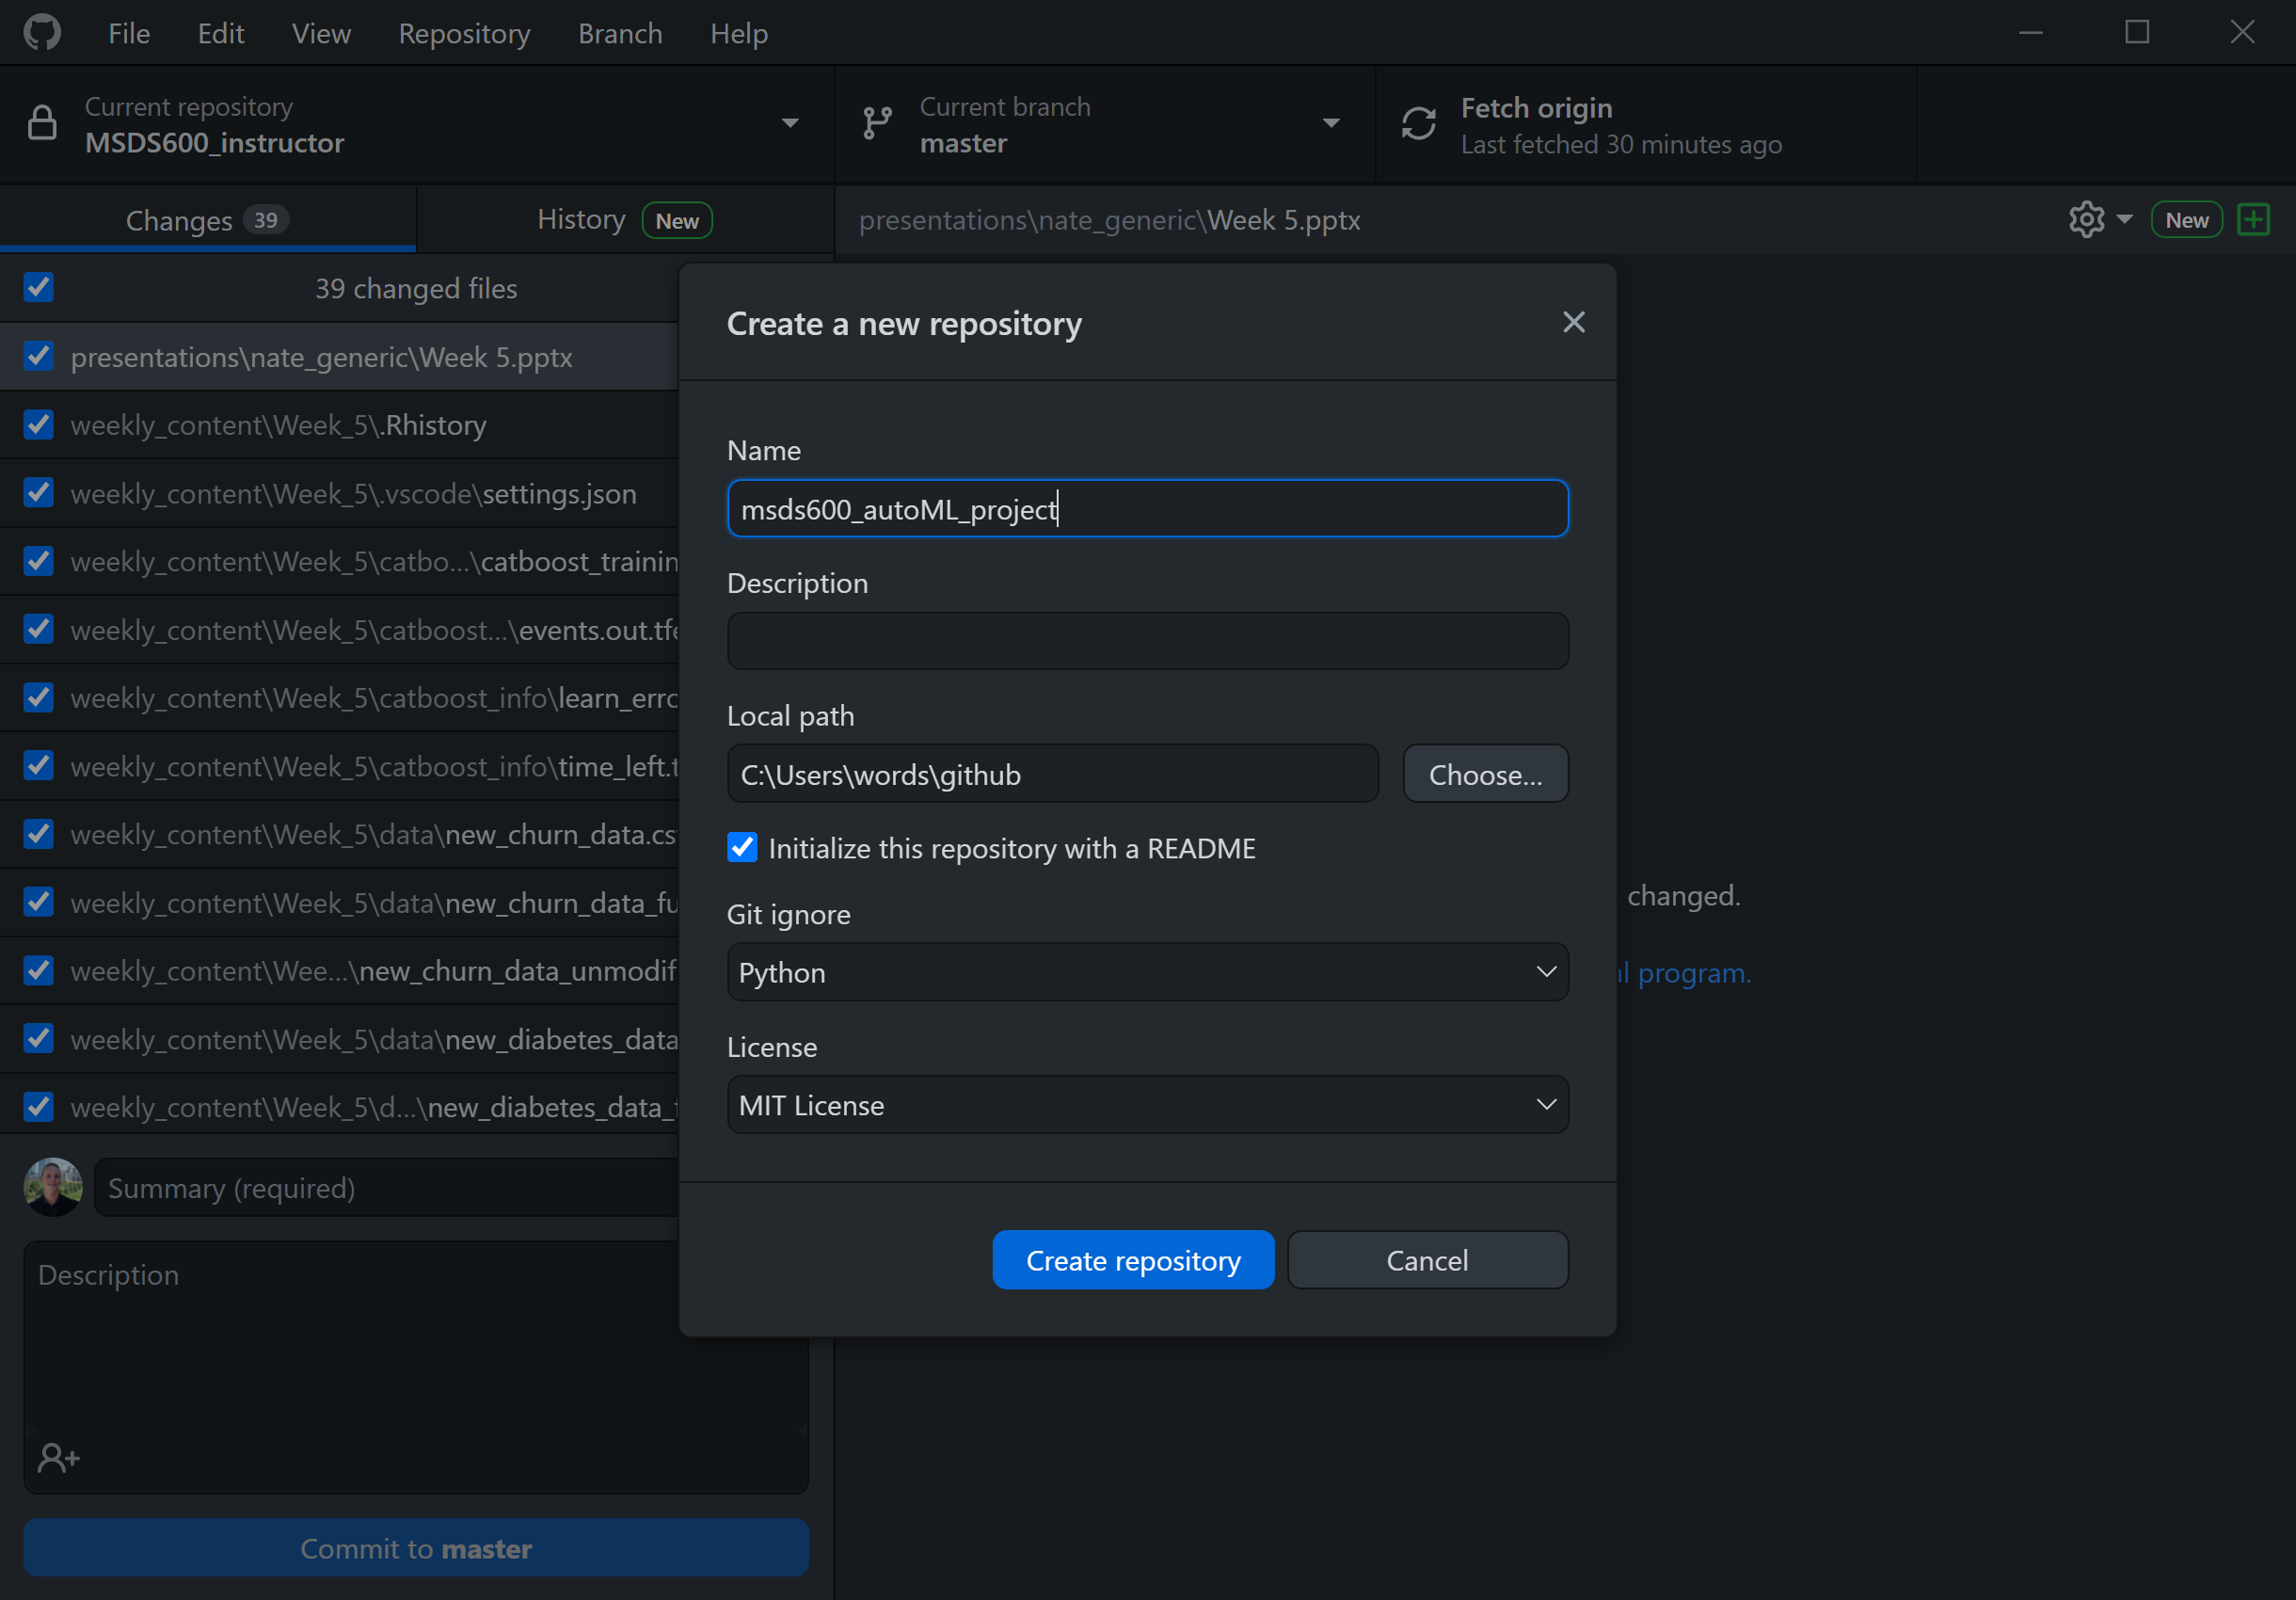

Once we've created the repository, we can open the folder by browsing there, with a hotkey through the GUI, or by clicking the button in the GUI to open the folder. We need to copy our work there, then write a short note in the 'summary' area, and hit 'commit to main'. The 'main' label is a branch of the Git repository - we can have several branches in parallel but 'main' is default. Then we can hit the 'push origin' button in the upper right to upload our data to the GitHub's cloud.  Last, we simply need to put the link in a text file and turn that in for our week 5 assignment (using the churn data instead of the diabetes data).

# Optional advanced section

Although we don't have walkthroughs for it this week, there are other autoML packages in Python that we can use. These have documentation with examples showing how to use them. For example, here are the docs for some of these:
- [H2O](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html)
- [TPOT](http://epistasislab.github.io/tpot/using/)
- [MLBox](https://mlbox.readthedocs.io/en/latest/introduction.html)

Of course, using these packages requires that you first install them. At least with H2O, using conda is easier than with pip.

We can also improve our Python module by using a class instead of plain functions. We can read more about creating classes [here](https://realpython.com/python3-object-oriented-programming/). 